In [1]:
                                                                                                                                                                                                                                                                        %matplotlib inline 
#inline allows the chart to be manipulated
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(ride_data_df, city_data_df,how='outer',on = 'city')

# Display the data table for preview
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
merge_df1 = merge_df[['city','type','driver_count']]
merge_df1 = merge_df1.drop_duplicates()
merge_df1 = merge_df1.sort_values('city').reset_index().drop('index',axis=1).dropna()
merge_df1.head()

,city,type,driver_count
0,Amandaburgh,Urban,12
1,Barajasview,Urban,26
2,Barronchester,Suburban,11
3,Bethanyland,Suburban,22
4,Bradshawfurt,Rural,7


In [3]:
merge_df1.shape

(120, 3)

In [4]:
city_ride_count = merge_df.groupby(['city']).count()['ride_id'].reset_index()
city_ride_count.head(2)


,city,ride_id
0,Amandaburgh,18
1,Barajasview,22


In [5]:
fare_avg = merge_df.groupby(['city']).mean()['fare'].reset_index()
fare_avg.head(2)

,city,fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273


In [6]:
new_df=pd.DataFrame({
    "city":city_ride_count['city'],
    "Ride Count":city_ride_count['ride_id'],
    "Average Fare":round(fare_avg['fare'],2)    
})
new_df.head()

,city,Ride Count,Average Fare
0,Amandaburgh,18,24.64
1,Barajasview,22,25.33
2,Barronchester,16,36.42
3,Bethanyland,18,32.96
4,Bradshawfurt,10,40.06


In [7]:
merge_df2 = pd.merge(merge_df1, new_df,how='outer',on = 'city')
#merge_df2 = merge_df2.drop('city_ride_count',axis=1)
merge_df2.columns = ['city', 'City Type','Drivers','Rides', 'Avg Fares']
merge_df2.head()

,city,City Type,Drivers,Rides,Avg Fares
0,Amandaburgh,Urban,12,18,24.64
1,Barajasview,Urban,26,22,25.33
2,Barronchester,Suburban,11,16,36.42
3,Bethanyland,Suburban,22,18,32.96
4,Bradshawfurt,Rural,7,10,40.06


## Bubble Plot of Ride Sharing Data

In [8]:
Suburban_df=merge_df2.loc[merge_df2['City Type'] == "Suburban"]
Suburban_df.head()

,city,City Type,Drivers,Rides,Avg Fares
2,Barronchester,Suburban,11,16,36.42
3,Bethanyland,Suburban,22,18,32.96
5,Brandonfort,Suburban,10,19,35.44
8,Colemanland,Suburban,23,22,30.89
9,Davidfurt,Suburban,23,17,32.00


In [9]:
Urban_df=merge_df2.loc[merge_df2['City Type'] == "Urban"]
Urban_df.head()

,city,City Type,Drivers,Rides,Avg Fares
0,Amandaburgh,Urban,12,18,24.64
1,Barajasview,Urban,26,22,25.33
6,Carriemouth,Urban,52,27,28.31
7,Christopherfurt,Urban,41,27,24.50
10,Deanville,Urban,49,19,25.84


In [10]:
Rural_df=merge_df2.loc[merge_df2['City Type'] == "Rural"]
Rural_df.head()

,city,City Type,Drivers,Rides,Avg Fares
4,Bradshawfurt,Rural,7,10,40.06
17,Garzaport,Rural,7,3,24.12
20,Harringtonfort,Rural,4,6,33.47
24,Jessicaport,Rural,1,6,36.01
33,Lake Jamie,Rural,4,6,34.36


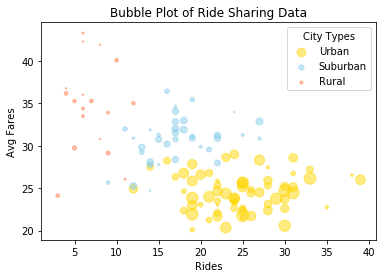

In [11]:
# Obtain the x and y coordinates for each of the three city types
color =["Gold", "SkyBlue", "Coral"]
city_type_list = merge_df2['City Type'].unique()


x1 = Urban_df['Rides']
y1 = Urban_df['Avg Fares']
z1 = Urban_df['Drivers']

x2 = Suburban_df['Rides']
y2 = Suburban_df['Avg Fares']
z2 = Suburban_df['Drivers']

x3 = Rural_df['Rides']
y3 = Rural_df['Avg Fares']
z3 = Rural_df['Drivers']

# Build the scatter plots for each city types
plt.scatter(x1,y1,s=z1*2,alpha=0.5,color=color[0])
plt.scatter(x2,y2,s=z2*2,alpha=0.5,color=color[1])
plt.scatter(x3,y3,s=z3*2,alpha=0.5,color=color[2])

# Incorporate the other graph properties
plt.title("Bubble Plot of Ride Sharing Data")
plt.xlabel('Rides')
plt.ylabel('Avg Fares')


# Create a legend
plt.legend(city_type_list, title ="City Types")
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/BubblePlotTim1.png")

In [12]:
# Show plot
plt.show()

## Total Fares by City Type

C:\Users\Tim Jung\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


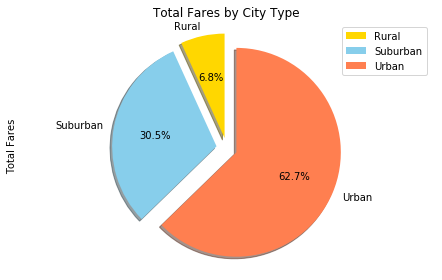

In [13]:
# Calculate Type Percents
merge_df3 = merge_df2[['City Type','Rides','Avg Fares']]
merge_df3['Total Fares']=merge_df3['Rides']*merge_df3['Avg Fares']
merge_df3 = merge_df3[['City Type','Total Fares']]
group_d3 = merge_df3.groupby(['City Type']).sum()
City_Type_Index1 = group_d3.keys()
City_Type_Index1
group_d3['% Total Fares'] = group_d3['Total Fares']/group_d3['Total Fares'].sum()
group_d3.head()

explode=(0.1,0.1,0.1)

# Build Pie Chart
Fare_Pie = group_d3.plot(kind="pie", y=City_Type_Index1, title=("Total Fares by City Type"),legend=True, colors=color,shadow = True, startangle=90,autopct= '%1.1f%%',explode=explode)


plt.tight_layout()
plt.axis("equal")

# Save Figure
plt.savefig("../Images/BubblePlotTim2.png")

In [14]:
# Show Figure
plt.show()

## Total Rides by City Type

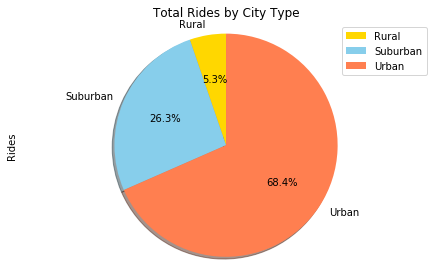

In [15]:
# Calculate Ride Percents
merge_df4 = merge_df2[['City Type','Rides']]
group_d4 = merge_df4.groupby(['City Type']).sum()
City_Type_Index2 = group_d4.keys()
City_Type_Index2

group_d4['% Total Rides'] = group_d4['Rides']/group_d4['Rides'].sum()
group_d4.head()

# Build Pie Chart
Ride_Pie = group_d4.plot(kind="pie", y=City_Type_Index2, title=("Total Rides by City Type"),colors=color,shadow = True, startangle=90,autopct= '%1.1f%%')


plt.tight_layout()
plt.axis("equal")

# Save Figure
plt.savefig("../Images/BubblePlotTim3png")

In [16]:
# Show Figure
plt.show()

## Total Drivers by City Type

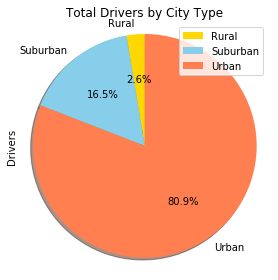

In [17]:
# Calculate Driver Percents
merge_df5 = merge_df2[['City Type','Drivers']]
group_d5 = merge_df5.groupby(['City Type']).sum()
City_Type_Index3 = group_d5.keys()
City_Type_Index3
group_d5['% Total Drivers'] = group_d5['Drivers']/group_d5['Drivers'].sum()
group_d5.head()
# Build Pie Charts
Drivers_Pie = group_d5.plot(kind = "pie", y=City_Type_Index3, title="Total Drivers by City Type",colors=color,shadow = True, startangle=90,autopct= '%1.1f%%')


plt.tight_layout()
plt.axis("square")

# Save Figure
plt.savefig("../Images/BubblePlotTim4.png")

In [18]:
# Show Figure
plt.show()

In [ ]:
# !!!OBSERVATIONS!!!
# 1. Ride demand is much higher in Urban areas overall and have the highest number of riders.
# 2. In reviewing the city types, higher ride demand looks to drive down the avg fare prices.
# 3. Total Fares is highest in Urban city types.